In [1]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

### Fitting a polynomial model.

We generate datapoints from a polynomial function

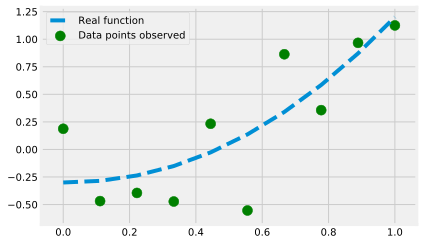

In [3]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.3

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 2.1 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
np.random.seed(1)
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [5]:
def to_polynomial(x):
    return np.vstack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8)).T
X = to_polynomial(x)

In [10]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
lr = LinearRegression()
lasso = LassoCV(max_iter=50000) # L1 regularization
ridge = RidgeCV() # L2 regularization

lr.fit(X, y)
lasso.fit(X, y)
ridge.fit(X, y)

C:\Users\houda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

linear regression learned parameters :

In [11]:
lr.coef_.astype(str)

array(['31.016469323081214', '-804.0106609069755', '6509.301400027098',
       '-25347.956249659666', '53725.628867324485', '-63373.931699584966',
       '39074.909832419464', '-9814.011998371743'], dtype='<U32')

lasso regression learned parameters :

In [9]:
lasso.coef_

array([0.        , 0.6330175 , 0.78060705, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [13]:
ridge.coef_

array([0.19024898, 0.2604394 , 0.23683549, 0.19819093, 0.1615921 ,
       0.13045791, 0.10479755, 0.08380705])

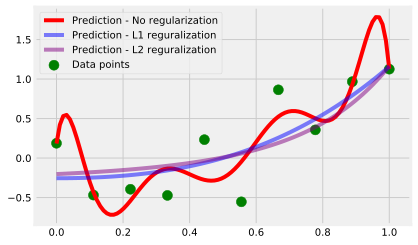

In [14]:
x_pred = np.linspace(0, 1, 100)
X_pred = to_polynomial(x_pred)

#plt.plot(x, y_real, '--', alpha=0.5, label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points')
plt.plot(x_pred, lr.predict(X_pred), c='red', label='Prediction - No regularization')
plt.plot(x_pred, lasso.predict(X_pred), c='blue',  alpha=0.5, label='Prediction - L1 reguralization')
plt.plot(x_pred, ridge.predict(X_pred), c='purple', alpha=0.5,  label='Prediction - L2 reguralization')
_ = plt.legend(loc='best')

## Impact of different levels of regularization.

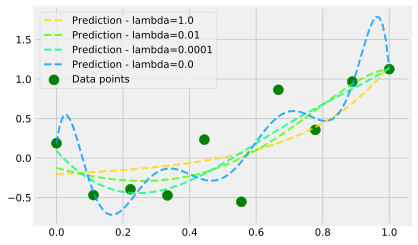

In [15]:
from sklearn.linear_model import Ridge
import seaborn as sns

x_pred = np.linspace(0, 1, 100)
X_pred = to_polynomial(x_pred)

plt.scatter(x, y, s=100, c='g', label='Data points')
for i, alpha in enumerate([1.0, 0.01, 0.0001, 0.]):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X, y)
  plt.plot(x_pred, ridge.predict(X_pred), '--', c=sns.color_palette('hsv')[i], alpha=0.8, linewidth=2, label=f'Prediction - lambda={alpha}')
_ = plt.legend(loc='best')

when lambda is bigger , the model is simpler 

## We can also ADD more data as a solution for our model overfitting probleme

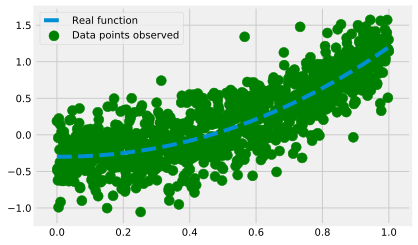

In [19]:
#@title We generate datapoints from a polynomial function.
n_points = 1000
noise_magnitude = 0.3

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 2.1 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
np.random.seed(1)
y = y_real + noise_magnitude * np.random.normal(size=n_points)

plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [20]:
X = to_polynomial(x)

In [21]:
lr.fit(X, y)
lasso.fit(X, y)
ridge.fit(X, y)

C:\Users\houda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
lr.coef_.astype(str)

array(['0.26796352536919876', '18.47459068697653', '-203.13963969014165',
       '906.6054215500867', '-2027.1943632853101', '2423.4111543687463',
       '-1478.665851535953', '361.70896204911486'], dtype='<U32')

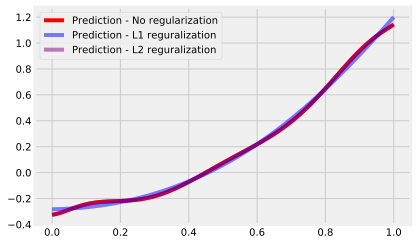

In [24]:
x_pred = np.linspace(0, 1, 100)
X_pred = to_polynomial(x_pred)

#plt.plot(x, y_real, '--', alpha=0.5, label='Real function')
#plt.scatter(x, y, s=100, c='g', label='Data points')
plt.plot(x_pred, lr.predict(X_pred), c='red', label='Prediction - No regularization')
plt.plot(x_pred, lasso.predict(X_pred), c='blue',  alpha=0.5, label='Prediction - L1 reguralization')
plt.plot(x_pred, ridge.predict(X_pred), c='purple', alpha=0.5,  label='Prediction - L2 reguralization')
_ = plt.legend(loc='best')